# Task 6: Image Comparison - Local Features

In [49]:
# Importing required modules
import cv2
import numpy as np
from matplotlib import pyplot as plt
import matplotlib as mpl

In [50]:
# Defining path to images
images_path = 'resources/images/'

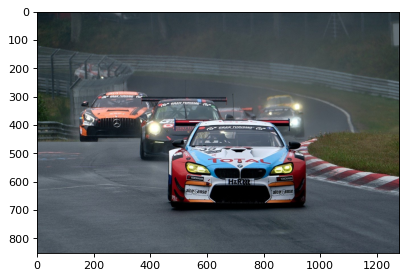

In [51]:
# Reading image with OpenCV and displaying on the screen
image_name = 'car-racing-4394450_1280.jpg'
image = cv2.imread(images_path + image_name)
mpl.rcParams['figure.dpi'] = 80
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

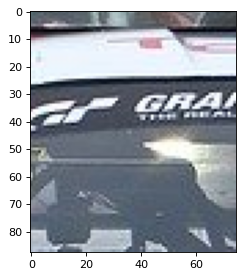

Cropped image resolution is 75x88


In [52]:
# Cutting piece of image with rows from 377 to 465 and columns from 602 to 677
image_cropped = image[377:465,602:677]
mpl.rcParams['figure.dpi'] = 80
plt.imshow(cv2.cvtColor(image_cropped, cv2.COLOR_BGR2RGB))
plt.show()

# Getting cropped image info
height, width, color_channels = image_cropped.shape
print("Cropped image resolution is {}x{}".format(width, height))

In [53]:
# Converting original and cropped images to grayscale
image_grayscale = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
image_cropped_grayscale = cv2.cvtColor(image_cropped, cv2.COLOR_BGR2GRAY)

# Initializing SIFT descriptor
sift = cv2.xfeatures2d.SIFT_create()

# Looking for keypoints and descriptors for the both images
kp1, des1 = sift.detectAndCompute(image_cropped_grayscale, None) 
kp2, des2 = sift.detectAndCompute(image_grayscale, None)

# Initializing BFMatcher
bf = cv2.BFMatcher(cv2.NORM_L1,crossCheck=True) 

# Comparing keypoints and corresponding descriptors for images
matches = bf.match(des1,des2)

# Sorting matches by distance
matches = sorted(matches, key = lambda x:x.distance)

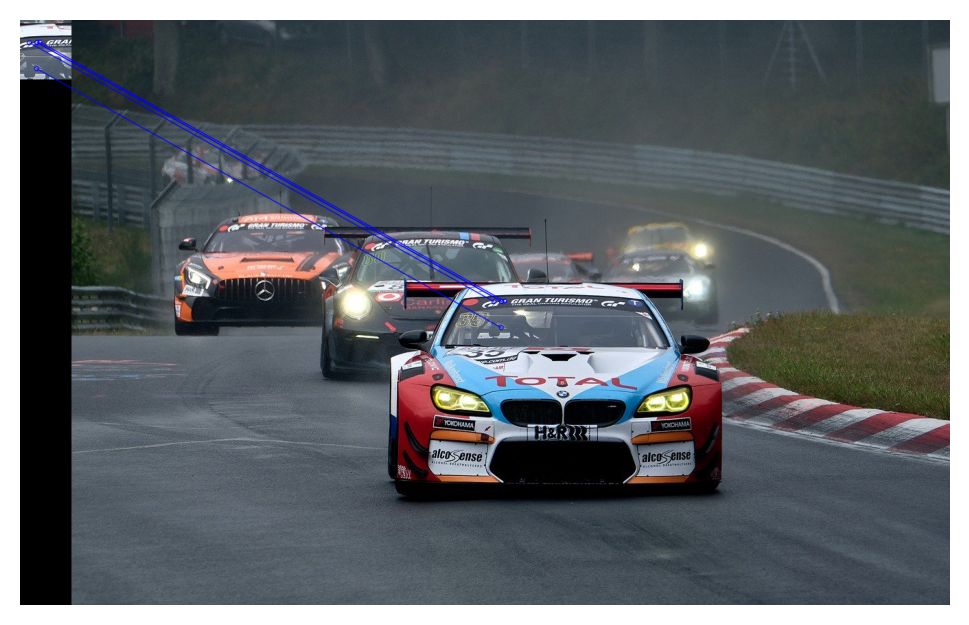

In [54]:
# Drawing 5 best matches on the image
matching_result = cv2.drawMatches(image_cropped, kp1, image, kp2, matches[:5], None, [255,0,0], flags=2)
mpl.rcParams['figure.dpi'] = 200
plt.axis('off')
plt.imshow(cv2.cvtColor(matching_result, cv2.COLOR_BGR2RGB))
plt.show()

In [55]:
# Getting coordinates of best match
(x1, y1) = kp2[matches[0].trainIdx].pt
print('X coordinate of point is: {}, Y coordinate of point is: {}'.format(x1, y1))

# Getting RGB values for this point
print('RGB values are the following: R: {}, G: {}, B: {}'.format(image[int(y1), int(x1)][2], image[int(y1), int(x1)][1], image[int(y1), int(x1)][0]))

X coordinate of point is: 615.2620239257812, Y coordinate of point is: 411.12298583984375
RGB values are the following: R: 250, G: 247, B: 255
